In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import gsw as sw
import scipy.stats as ss
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

from netCDF4 import Dataset

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import cruise data

in_file = '../data/KuroAlldata.csv'
data = pd.read_csv(in_file, sep = ',')

in_file = '../data/Kuroshio_Phytoplankton.csv'
phyto = pd.read_csv(in_file, sep = ',')

in_file = '../data/Kuro_chl_coords.csv'
chl = pd.read_csv(in_file, sep = ',')

print chl.columns

Index([u'station', u'lat', u'lon', u'bottle', u'depth (m)', u'fluorescence',
       u'chlorophyll (ug/l)', u'Unnamed: 7'],
      dtype='object')


In [3]:
# do chl calibration

sub = chl[['fluorescence', 'chlorophyll (ug/l)']].dropna()

mT,cT, rT, pT, std_errT = ss.linregress(sub['fluorescence'],sub['chlorophyll (ug/l)'])
chl['CHL'] = mT*chl['fluorescence']+cT

# plt.plot(np.arange(-0.1, 1.1, 0.1), mT*(np.arange(-0.1, 1.1, 0.1))+cT, 'r')
# plt.plot(chl['fluorescence'], chl['chlorophyll (ug/l)'], '.')
# plt.plot(chl['fluorescence'], chl['CHL'], 'xb')
# plt.show()

print 'estimated calibration slope = ', mT, ', r = ', rT, ', p-value < 0.05 ', pT<0.05

#integrate fluorescence and T, S data
sub = data[['station','bottle', 'depth (m)', 'T(C)', 'theta', 'S', 'sigma_t']]

temp = chl.merge(sub, on = ['station','bottle', 'depth (m)'], how = 'inner')
temp = temp.drop(['chlorophyll (ug/l)', 'Unnamed: 7'], axis = 1).dropna()

#temp['pt'] = sw.conversions.pt0_from_t(temp['S'],temp['T(C)'], temp['depth (m)']) 
#print temp[['depth (m)', 'T(C)','theta', 'pt']]

estimated calibration slope =  1.24413568902 , r =  0.937132630412 , p-value < 0.05  True


In [14]:
# cluster stations based on T/S
sub = pd.DataFrame()
sub['S'] = (temp['S']-np.min(temp['S']))/(max(temp['S'])-min(temp['S']))
sub['theta'] = (temp['theta']-np.min(temp['theta']))/(max(temp['theta'])-min(temp['theta']))
# sub['CHL'] = (temp['CHL']-np.min(temp['CHL']))/(max(temp['CHL'])-min(temp['CHL']))

Z = linkage(sub, 'ward')

c, coph_dists = cophenet(Z, pdist(sub))
c

0.85275978846407041

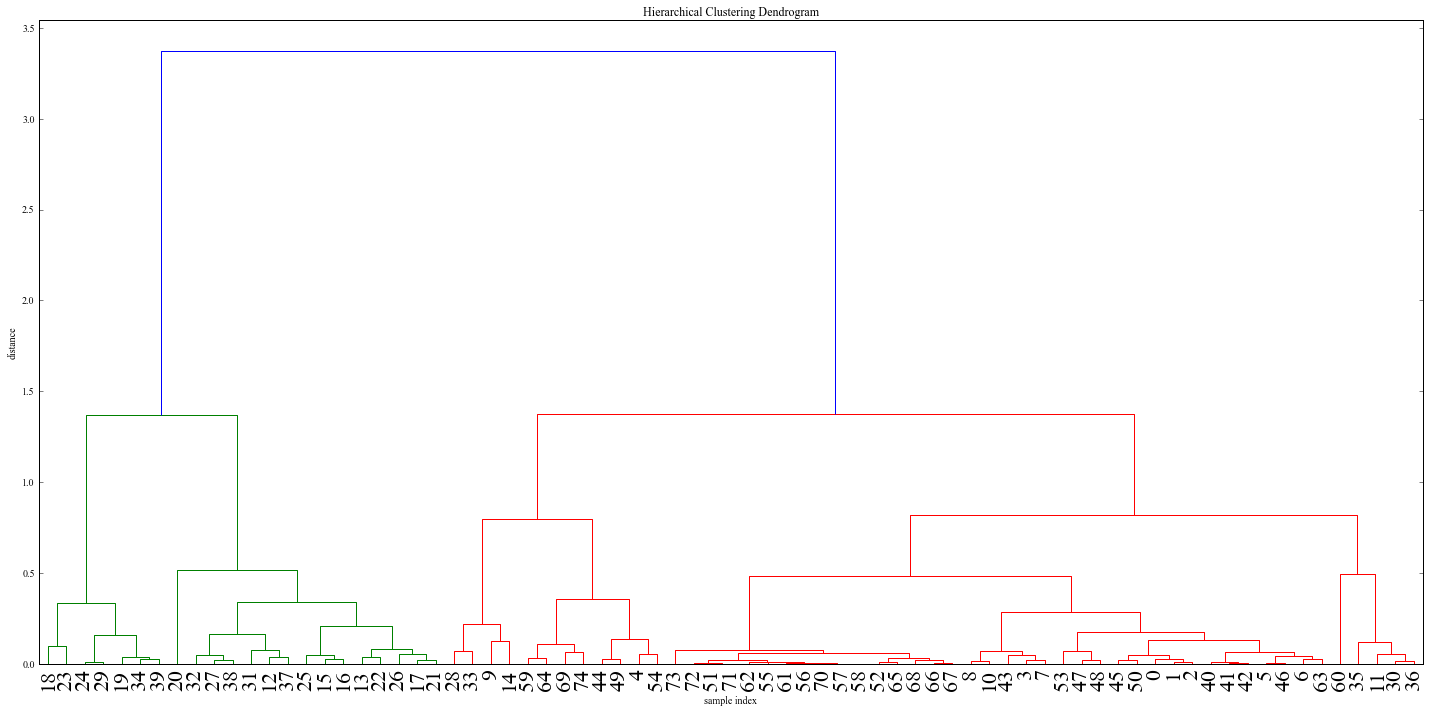

In [19]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=22.,  # font size for the x axis labels
)
plt.show()

In [16]:
chl['station']

0       1
1       1
2       1
3       1
4       1
5       2
6       2
7       2
8       2
9       2
10      3
11      3
12      3
13      3
14      3
15      4
16      4
17      4
18      4
19      4
20      5
21      5
22      5
23      5
24      5
25      6
26      6
27      6
28      6
29      6
       ..
175    36
176    36
177    36
178    36
179    36
180    37
181    37
182    37
183    37
184    37
185    38
186    38
187    38
188    38
189    38
190    39
191    39
192    39
193    39
194    39
195    40
196    40
197    40
198    40
199    40
200    41
201    41
202    41
203    41
204    41
Name: station, dtype: int64